# Simple Linear regression

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_excel('cricket_data.xlsx')
data

,Chirps / second,Temperature F
0,20.00,88.59
1,16.00,71.59
2,19.79,93.30
3,18.40,84.30
4,17.10,80.59
5,15.50,75.19
6,14.70,69.69
7,17.10,82.00
8,15.40,69.40
9,16.20,83.30


In [3]:
data.columns

Index(['Chirps / second', 'Temperature F'], dtype='object')

In [4]:
data = data.rename(columns = {'Chirps / second':'X','Temperature F':'y'})
data

,X,y
0,20.00,88.59
1,16.00,71.59
2,19.79,93.30
3,18.40,84.30
4,17.10,80.59
5,15.50,75.19
6,14.70,69.69
7,17.10,82.00
8,15.40,69.40
9,16.20,83.30


#### X = chirps/sec for the striped ground cricket
#### y = temperature in degrees Fahrenheit
#### Reference: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

# All values must be numerical for a regression algorithm

## Set up plot and axis names

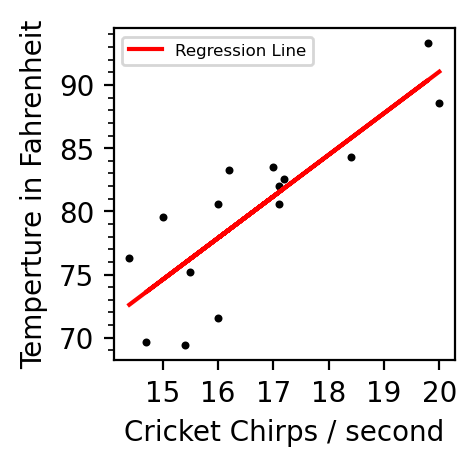

In [5]:
x = data['X']
y = data['y']


fig = plt.figure(figsize=(2.2,2.2), dpi=200)
ax = plt.subplot(111)

ax.xaxis.set_major_locator(MaxNLocator(7))
ax.yaxis.set_major_locator(MaxNLocator(6))

ax.xaxis.set_minor_locator(MultipleLocator(3))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.set_xlabel("Cricket Chirps / second")
ax.set_ylabel("Temperture in Fahrenheit")

#******************************************************************

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)


line = slope*x+intercept
plt.plot(x, line, 'r', label='Regression Line'.format(slope,intercept))

#******************************************************************

plt.scatter(x,y, color="k", s=3.5)
plt.legend(fontsize=6)

plt.show()

# More advanced LR model

In [6]:
data = pd.read_csv('marketing_customer_analysis copy.csv')

### Function created to clean data

In [7]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type'])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df['month'] = df['effective_to_date'].dt.month
    return df

In [8]:
data2 = clean_data(data)

In [9]:
data2 = data2.reset_index()
data2.head()

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2


### Breaking data into features (X) and target (y)

### First dropping unhelpful columns

In [10]:
data2=data2.drop(columns=['index','customer', 'effective_to_date','month'],axis=1)

In [11]:
X=data2.drop('total_claim_amount', axis=1)
y=data2['total_claim_amount']

In [12]:
print('Mean:     ',y.mean())
print('Maximum:  ',y.max())
print('Minimum:  ',y.min())
print('Length:   ',len(y))


Mean:      434.08879431289563
Maximum:   2893.239678
Minimum:   0.09900700000000001
Length:    9134


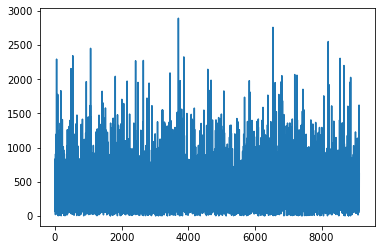

In [13]:
y.plot()

### Splitting data into training and testing

In [14]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.2, random_state = 13)

In [16]:
display(X_train.head())
y_train.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
1212,Oregon,2780.196856,No,Basic,High School or Below,Disabled,F,20261,Suburban,Divorced,...,4.0,55,0.0,1,Personal Auto,Personal L2,Offer4,Web,Four-Door Car,Large
5656,Washington,12302.762440,No,Basic,Bachelor,Employed,F,43817,Urban,Married,...,25.0,12,1.0,2,Personal Auto,Personal L3,Offer3,Branch,Four-Door Car,Medsize
7437,California,8259.110800,No,Extended,Bachelor,Disabled,F,20305,Suburban,Single,...,14.0,63,1.0,2,Personal Auto,Personal L2,Offer2,Call Center,Two-Door Car,Medsize
3274,Arizona,8427.172486,Yes,Extended,Bachelor,Employed,F,46503,Suburban,Divorced,...,4.0,21,1.0,1,Personal Auto,Personal L2,Offer1,Agent,Luxury SUV,Medsize
5153,California,10097.198370,No,Basic,High School or Below,Employed,M,68997,Urban,Married,...,3.0,26,0.0,2,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Large


1212     345.600000
5656     245.447622
7437     496.477418
3274    1032.000000
5153     206.926432
Name: total_claim_amount, dtype: float64

### Further splitting into Train_numerical, Test_numerical, Train_categorical, and Test_categorical
### These need to be treated separately so we do not bleed test data into our training data.

In [17]:
X_train_num =  X_train.select_dtypes(np.number)
X_test_num =  X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

## We only fit on the training data.  We transform both Train and Test.
### LR uses distance (to the line, plane), so scaling is important to ensure all columns are treated as equally important: MinMaxScaler, StandardScaler, (LogScaler if range is super large)

In [18]:
scaler = MinMaxScaler().fit(X_train_num)

X_train_norm = scaler.transform(X_train_num)
X_train_num_scale = pd.DataFrame(X_train_norm, columns=X_train_num.columns)
X_train_num_scale.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.012187,0.202649,0.046414,0.114286,0.555556,0.0,0.000
1,0.143842,0.438253,0.004219,0.714286,0.121212,0.2,0.125
2,0.087936,0.203089,0.063291,0.400000,0.636364,0.2,0.125
3,0.090260,0.465118,0.649789,0.114286,0.212121,0.2,0.000
4,0.113349,0.690101,0.008439,0.085714,0.262626,0.0,0.125


In [19]:
X_test_norm = scaler.transform(X_test_num)
X_test_num_scale = pd.DataFrame(X_test_norm, columns=X_test_num.columns)
X_test_num_scale.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.067677,0.222542,0.105485,0.285714,0.363636,0.0,0.25
1,0.031412,0.294676,0.194093,0.800000,0.232323,0.2,0.00
2,0.004750,0.000000,0.025316,0.428571,0.757576,0.6,0.00
3,0.045823,0.126154,0.037975,0.171429,0.818182,0.0,0.25
4,0.039101,0.130395,0.265823,0.800000,0.494949,0.0,0.00


## Encoding the categorical variables
### One-hot encode categoricals (can use get_dummies, but be careful: need to have same (order of) columns for training and test set)


In [20]:
# Create encoder to be used on new data later.

encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.head()


<IPython.core.display.Javascript object>

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
cols2 = encoder.get_feature_names(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Put numerical and categorical back together

In [22]:
X_train = pd.concat([X_train_num_scale, X_train_cat_encode], axis=1) 

In [23]:
X_test = pd.concat([X_test_num_scale, X_test_cat_encode], axis=1) 

In [24]:
display(X_train.head())
y_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.012187,0.202649,0.046414,0.114286,0.555556,0.0,0.000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.143842,0.438253,0.004219,0.714286,0.121212,0.2,0.125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.087936,0.203089,0.063291,0.400000,0.636364,0.2,0.125,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.090260,0.465118,0.649789,0.114286,0.212121,0.2,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.113349,0.690101,0.008439,0.085714,0.262626,0.0,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1212     345.600000
5656     245.447622
7437     496.477418
3274    1032.000000
5153     206.926432
Name: total_claim_amount, dtype: float64

## Linear Regression Model
### Define and train (fit) model on X_train, y_train

In [36]:
from sklearn.linear_model import LinearRegression as LinReg

linreg = LinReg()    # model
linreg.fit(X_train, y_train)   # model training


LinearRegression()

### Use X_test to create predictions, compare to y_test

In [37]:
y_pred = linreg.predict(X_test)   # model prediction

In [38]:
y_pred

array([470.49979075, 620.55854261, 509.86699438, ..., 447.28155201,
       311.51228214, 536.78390155])

# Function created for running all metrics

### Validation Metrics
#### Use metrics (R2,  MSE, RMSE, MAE) to evaluate the model on train and test sets

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

def metrics(X, y):
    #Finds and prints the metrics of the algorithm
    predictions = linreg.predict(X)
    r2 = r2_score(y, predictions)
    print('R2:', r2)
    mse = (mean_squared_error(y,predictions))
    print('MSE:', mse)
    rmse = np.math.sqrt(mse)
    print('RMSE:', rmse)
    mae = mean_absolute_error(y, predictions)
    print('MAE:', mae)

In [51]:
metrics(X_train,y_train)

R2: 0.7711958936087766
MSE: 19185.348861436552
RMSE: 138.51118677361967
MAE: 95.26721953935075


In [52]:
metrics(X_test,y_test)

R2: 0.7764674864007555
MSE: 19336.03340066034
RMSE: 139.05406646574684
MAE: 94.13784855691242


#### R2 score 

In [53]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.7711958936087766 -- test R2: 0.7764674864007555


#### Mean Squared Error

In [54]:
train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(y_pred, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 19185.348861436552 -- test MSE: 19336.03340066034


#### Root Mean Squared Error

In [55]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 138.51118677361967 -- test RMSE: 139.05406646574684


#### Mean Absolute Error

In [56]:
train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(y_pred, y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))

train MAE: 95.26721953935075 -- test MAE: 94.13784855691242
